# Gray-Scott Model of Reaction-Diffusion

The essence of the Gray-Scott model is aimed at simulating the interaction of two chemicals that diffuse, react, and are replenished and consumed at specific rates. By varying these numerical quantities we obtain different patterns and types of behavior. The discretized equations governing the system for chemical $A$ and $B$ are:

$$ A' = A + ( D_A \nabla^2 A - AB^2 + f(1-A)) \ \Delta t $$

$$ B' = B + ( D_B \nabla^2 B - AB^2 - (k+f)B) \ \Delta t $$

$D_A$ is the diffusion coefficient of chemical *A*

$D_B$ is the diffusion coefficient of chemical *B*

$f$ feed rate of chemical *A*

$k$ kill rate of chemical *B*


The grids of chemicals *A* and *B* are initialized with A=1 and B=0. Then, a small area of *B* is seeded with ones. The starting pattern can modified to explore different scenarios. Try regular patterns and random patterns. I suggest setting the random seed, so that if you find a cool pattern you can reproduce it later on.

The problem can be coded using constant boundary conditions or using the Born-von Karman conditions which aim at simulating an infinite media. The latter is also referred as torus, in which the sliding 2D window to compute the Laplacian uses the opposite row or column when exceeding the system boundaries.


In [74]:
# Import modules
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [75]:
# Define colormap
cmap = 'gray'

In [76]:
# Define constants
D_A = 0.03  # Diffusion rate of chemical A
D_B = 0.02  # Diffusion rate of chemical B
f = 0.01     # feed rate at which chemical A is added
k = 0.062   # kill rate at which chemical B is removed
delta_t = 1;


In [125]:
# Create inital matrix
N = 64
rows = 64
cols = 64
A = np.ones([rows,cols], dtype=np.float64)
B = np.zeros([rows,cols], dtype=np.float64)


In [126]:
# Seed with A and B
B[30:34,30:34] = 1
#A += 0.01*np.random.random((N,N))
#B += 0.01*np.random.random((N,N))
#c = 8 # Offset to form a square
#seed_rows = range(round(rows/2)-c, round(rows/2)+c)
#seed_cols = range(round(cols/2)-c, round(cols/2)+c)
#A[seed_rows,seed_cols] = 0.75
#B[seed_rows,seed_cols] = 0.25


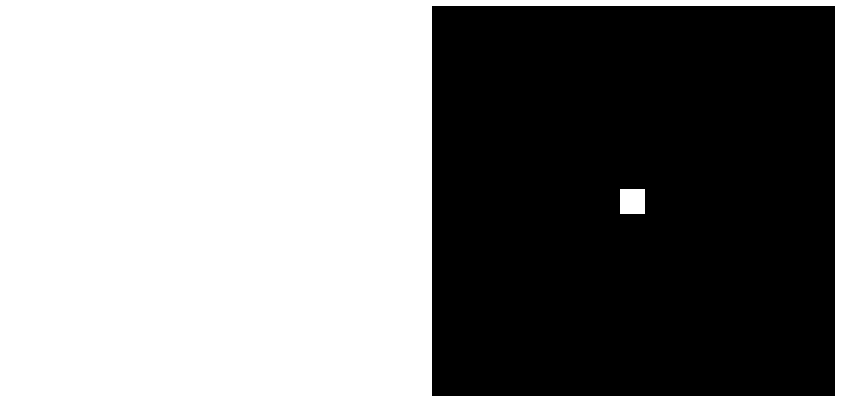

In [128]:
# Plot initial conditions
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.tight_layout()
plt.axis('off')
plt.imshow(A, cmap='Greys')

plt.subplot(1,2,2)
plt.tight_layout()
plt.axis('off')
plt.pcolormesh(B, cmap='Greys_r')
plt.show()


In [129]:
B[28:36,28:36]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [130]:
# Define moving window
offset_rows = np.array([ [-1, -1, -1], [0, 0, 0], [1, 1, 1] ])
offset_cols = np.array([ [-1, 0, 1], [-1, 0, 1], [-1, 0, 1] ])

# Define Laplacian weights
W = np.array([ [0.05, 0.2, 0.05], [0.2, -1, 0.2], [0.05, 0.2, 0.05] ]);
#W = np.array([ [0.0625, 0.1875, 0.0625], [0.1875, -1, 0.1875], [0.0625, 0.1875, 0.0625] ]);


In [131]:
# Pre-allocate new array
Anew = np.ones(A.shape)*np.nan
Bnew = np.ones(B.shape)*np.nan

# Get time at the beginning of the simulation
tic = time.perf_counter()

for t in range(3000):
    for i in range(rows):
        for j in range(cols):
            
            # Torus for rows
            rows_set = i + offset_rows
            rows_set[rows_set >= rows] = 0 # if higher than last row, then use first row
            rows_set[rows_set < 0] = rows - 1  # if lower than first row, then use last row
            
            # Torus for columns
            cols_set = j + offset_cols
            cols_set[cols_set >= cols] = 0 # if higher than last column, then use first column
            cols_set[cols_set < 0] = cols - 1 # if lower than first column, then use last column
            
            # Compute Laplacian
            L_A = A[rows_set, cols_set] * W
            L_B = B[rows_set, cols_set] * W
            
            Anew[i,j] = A[i,j] + ( D_A * L_A.sum() - A[i,j] * B[i,j]**2 + f*(1-A[i,j]) ) * delta_t
            Bnew[i,j] = B[i,j] + ( D_B * L_B.sum() + A[i,j] * B[i,j]**2 - (k+f)*B[i,j] ) * delta_t

    A = Anew;
    B = Bnew;
    
    Anew = np.ones(A.shape)*np.nan
    Bnew = np.ones(B.shape)*np.nan

    
# Get time at end of simulation
toc = time.perf_counter()

# Let us know that the interpreter finished
print('Done in ',str(toc-tic))


Done in  352.40046339699984


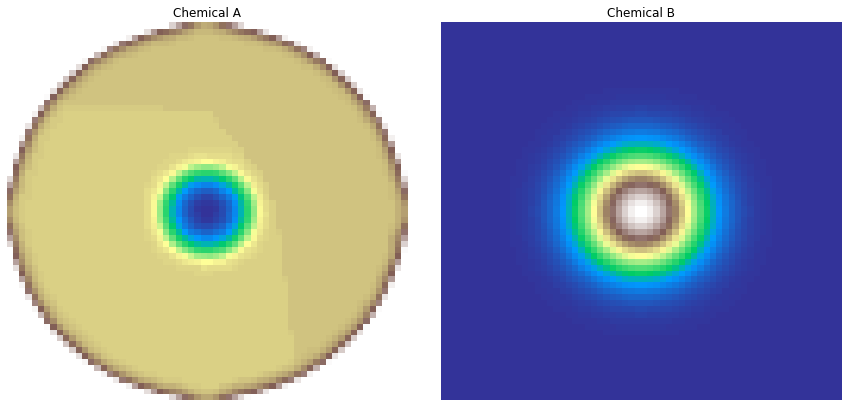

In [134]:
# Create figure
cmap = 'terrain'
plt.figure(figsize=(12,6),facecolor='w')

plt.subplot(1,2,1)
plt.title('Chemical A')
plt.tight_layout()
plt.axis('off')
plt.pcolormesh(A, cmap=cmap)
    
plt.subplot(1,2,2)
plt.title('Chemical B')
plt.tight_layout()
plt.axis('off')
plt.pcolormesh(B, cmap=cmap)
plt.show()

## References

https://www.karlsims.com/rd.html